In [1]:
import shap
import joblib
import pandas as pd

model = joblib.load(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\backend\resources\model_LGB.joblib")
client_id = 100001

data_test = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_test_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR")

data_train = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR")



Trying to unpickle estimator LabelEncoder from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [2]:
client_df = data_test[data_test.index == client_id]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(client_df)
expected_values = explainer.expected_value

print(expected_values)

[2.9474512818708796, -2.9474512818708796]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [3]:
shap_values

[array([[-1.46711596e-01, -5.07538082e-03, -6.25014641e-04,
         -2.97151643e-04,  7.63564190e-03, -2.58244999e-02,
          4.97789705e-02, -8.18665965e-02, -2.71566152e-02,
          1.55535622e-02, -4.73394589e-03,  3.08614403e-03,
         -2.42486219e-02, -8.28803212e-02,  0.00000000e+00,
          0.00000000e+00,  1.21067635e-02,  0.00000000e+00,
         -6.21189750e-03, -4.43217734e-04,  6.22545941e-05,
          1.51985539e-03, -5.10667947e-04,  3.97815925e-02,
          0.00000000e+00,  0.00000000e+00, -2.64625988e-05,
          7.94539378e-03, -4.12883354e-06,  4.30475640e-04,
          4.42408776e-01,  8.24262692e-01, -7.28413596e-01,
          1.11258131e-03, -1.59359435e-03, -2.07929770e-03,
         -2.47856076e-04, -6.10452862e-05,  2.27812586e-03,
          1.66048960e-03, -4.32009025e-03,  1.20385287e-04,
          7.91635436e-04,  4.93617557e-04, -8.27624951e-04,
          3.52285399e-06,  6.73608249e-04,  3.40589247e-03,
          2.30458128e-03, -1.28126765e-0

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import joblib

In [5]:
prediction = 0

In [6]:
columns = client_df.columns

In [7]:
DATA_ALL_CLIENTS_PATH = r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz"

In [8]:
columns_list = ['PAYMENT_RATE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                "AMT_ANNUITY",
                "SK_ID_CURR", "TARGET"]

In [9]:
data_all_clients = pd.read_csv(DATA_ALL_CLIENTS_PATH, encoding="utf-8", index_col="SK_ID_CURR",
                               usecols=columns_list)

In [10]:
feature_1 = 'AMT_ANNUITY'
feature_2 = 'EXT_SOURCE_2'

In [11]:
data_all_clients

,TARGET,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,PAYMENT_RATE
SK_ID_CURR,,,,,,,,
100002,1,24700.5,-9461,-637.0,0.083037,0.262949,0.139376,0.060749
100003,0,35698.5,-16765,-1188.0,0.311267,0.622246,NaN,0.027598
100004,0,6750.0,-19046,-225.0,NaN,0.555912,0.729567,0.050000
100006,0,29686.5,-19005,-3039.0,NaN,0.650442,NaN,0.094941
100007,0,21865.5,-19932,-3038.0,NaN,0.322738,NaN,0.042623
...,...,...,...,...,...,...,...,...
456251,0,27558.0,-9327,-236.0,0.145570,0.681632,NaN,0.108198
456252,0,12001.5,-20775,NaN,NaN,0.115992,NaN,0.044524
456253,0,29979.0,-14966,-7921.0,0.744026,0.535722,0.218859,0.044239


In [40]:
x_client = client_df[feature_1].iloc[0]
y_client = client_df[feature_2].iloc[0]

In [44]:
y_client

0.7896543511176771

In [43]:
client_df[feature_2]

SK_ID_CURR
100001    0.789654
Name: EXT_SOURCE_2, dtype: float64

In [69]:

def contourplot(feature_1, feature_2, client_df, client_id, df_all_clients):
    """Contour plot for the observed probability of default as a function of 2 features.
    Args :
    - feature1 (string).
    - feature2 (string).
    Returns :
    - matplotlib plot via st.pyplot.
    """
    figure = contourplot_in_common(df_all_clients, feature_1, feature_2)
    x_client = client_df[feature_1].iloc[0]
    y_client = client_df[feature_2].iloc[0]
    if str(x_client) == "nan" or str(y_client) == "nan":
        x_center = (plt.xlim()[1] + plt.xlim()[0]) / 2
        y_center = (plt.ylim()[1] + plt.ylim()[0]) / 2
        plt.text(s=f" Client {client_id}\n  data not available",
                 x=x_center,
                 y=y_center)
    else:
        plt.axvline(x=x_client,
                    ymin=-1e10,
                    ymax=1e10,
                    c='k',
                    ls='dashed',
                    lw=1)
        plt.axhline(y=y_client,
                    xmin=-1e10,
                    xmax=1e10,
                    c='k',
                    ls='dashed',
                    lw=1)
        # if I want to interpolate data : https://stackoverflow.com/questions/5666056/matplotlib-extracting-data-from-contour-lines
    #plt.show()
    #st.pyplot(figure)
    #st.caption(feature_1 + ": " + feature_description(feature_1))
    #st.caption(feature_2 + ": " + feature_description(feature_2))

In [67]:

def contourplot_in_common(df_all_clients, feature_1, feature_2):
    """Contour plot for the observed probability of default as a function of 2 features. Common to all clients.
    Args :
    - feature1 (string).
    - feature2 (string).
    Returns :
    - matplotlib figure.
    """
    target_mesh_size = 500  # target population for each mesh

    # Preparation of data
    df = pd.DataFrame({
        feature_1: df_all_clients[feature_1],
        feature_2: df_all_clients[feature_2],
        'y_true': df_all_clients["TARGET"]
    })
    df = df.dropna().copy()
    n_values = len(df)
    n_bins = int(np.ceil(np.sqrt(n_values / target_mesh_size)))
    bin_size = int(np.floor(n_values / n_bins))
    index_bin_start = sorted([bin_size * n for n in range(n_bins)])
    ser1 = df[feature_1].sort_values().copy()
    ser2 = df[feature_2].sort_values().copy()

    # Filling the grid
    grid_proba_default = np.full((n_bins, n_bins), -1.0)
    ser_true0 = (df['y_true'] == 0)
    ser_true1 = (df['y_true'] == 1)
    for i1, ind1 in enumerate(index_bin_start):
        for i2, ind2 in enumerate(index_bin_start):
            ser_inside_this_mesh = (df[feature_1] >= ser1.iloc[ind1]) & (df[feature_2] >= ser2.iloc[ind2]) & (
                    df[feature_1] <= ser1.iloc[ind1 + bin_size - 1]) & (
                                           df[feature_2] <= ser2.iloc[ind2 + bin_size - 1])
            # sum of clients true0 inside this square bin
            sum_0 = (ser_inside_this_mesh & ser_true0).sum()
            sum_1 = (ser_inside_this_mesh & ser_true1).sum()
            sum_ = sum_0 + sum_1
            if sum_ == 0:
                proba_default = 1
            else:
                proba_default = sum_1 / sum_
            grid_proba_default[i2, i1] = proba_default

    # X, Y of the grid
    X = [ser1.iloc[i + int(bin_size / 2)] for i in index_bin_start]
    Y = [ser2.iloc[i + int(bin_size / 2)] for i in index_bin_start]

    # Plotting
    plt.style.use('seaborn')
    fig = plt.figure(edgecolor='black', linewidth=4)
    plt.contourf(X, Y, grid_proba_default, cmap='Reds')
    plt.colorbar(shrink=0.8)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    fig.suptitle(
        f'Observed probability of default as a function of {feature_1} and {feature_2}',
        y=0.92)
    return fig



Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


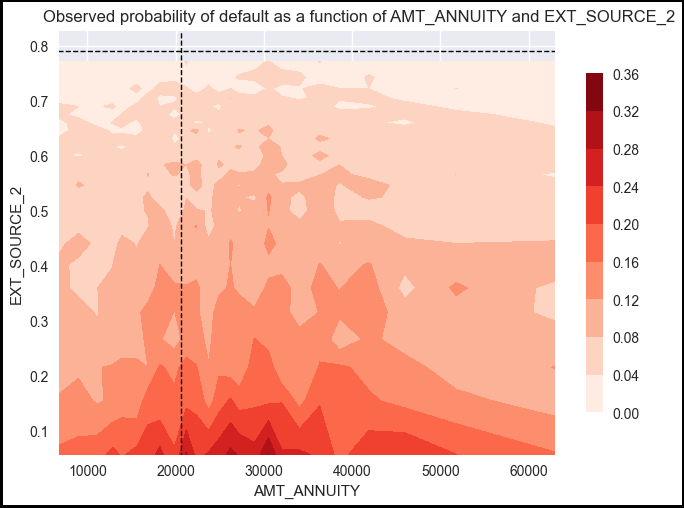

In [70]:
contourplot(feature_1, feature_2, client_df, client_id, data_all_clients)

In [12]:
target_mesh_size = 500  # target population for each mesh

In [34]:
# Preparation of data
df = pd.DataFrame({
    feature_1: data_all_clients[feature_1],
    feature_2: data_all_clients[feature_2],
    'y_true': data_all_clients["TARGET"]
})


In [26]:
df

,AMT_ANNUITY,EXT_SOURCE_2,y_true
SK_ID_CURR,,,
100002,24700.5,0.262949,1
100003,35698.5,0.622246,0
100004,6750.0,0.555912,0
100006,29686.5,0.650442,0
100007,21865.5,0.322738,0
...,...,...,...
456251,27558.0,0.681632,0
456252,12001.5,0.115992,0
456253,29979.0,0.535722,0


In [62]:
df = df.dropna().copy()

In [28]:
df

,AMT_ANNUITY,EXT_SOURCE_2,y_true
SK_ID_CURR,,,
100002,24700.5,0.262949,1
100003,35698.5,0.622246,0
100004,6750.0,0.555912,0
100006,29686.5,0.650442,0
100007,21865.5,0.322738,0
...,...,...,...
456251,27558.0,0.681632,0
456252,12001.5,0.115992,0
456253,29979.0,0.535722,0


In [63]:
n_values = len(df)
n_bins = int(np.ceil(np.sqrt(n_values / target_mesh_size)))
bin_size = int(np.floor(n_values / n_bins))
index_bin_start = sorted([bin_size * n for n in range(n_bins)])
ser1 = df[feature_1].sort_values().copy()
ser2 = df[feature_2].sort_values().copy()

In [18]:
n_values

306835

In [64]:
ser2


SK_ID_CURR
127936    8.173617e-08
289646    1.315956e-06
315717    5.002109e-06
305482    5.600338e-06
366811    5.939651e-06
              ...     
192297    8.549997e-01
274603    8.549997e-01
440711    8.549997e-01
182029    8.549997e-01
450870    8.549997e-01
Name: EXT_SOURCE_2, Length: 306835, dtype: float64

In [36]:
# Filling the grid
grid_proba_default = np.full((n_bins, n_bins), -1.0)
ser_true0 = (df['y_true'] == 0)
ser_true1 = (df['y_true'] == 1)
for i1, ind1 in enumerate(index_bin_start):
    for i2, ind2 in enumerate(index_bin_start):
        ser_inside_this_mesh = (df[feature_1] >= ser1.iloc[ind1]) & (df[feature_2] >= ser2.iloc[ind2]) & (
                df[feature_1] <= ser1.iloc[ind1 + bin_size - 1]) & (df[feature_2] <= ser2.iloc[ind2 + bin_size - 1])

        # sum of clients true0 inside this square bin
        sum_0 = (ser_inside_this_mesh & ser_true0).sum()
        sum_1 = (ser_inside_this_mesh & ser_true1).sum()
        sum_ = sum_0 + sum_1
        if sum_ == 0:
            proba_default = 1
        else:
            proba_default = sum_1 / sum_
        grid_proba_default[i2, i1] = proba_default

In [31]:
ser_inside_this_mesh

SK_ID_CURR
100002    False
100003    False
100004    False
100006    False
100007    False
          ...  
456251    False
456252    False
456253    False
456254    False
456255    False
Length: 306835, dtype: bool

In [37]:


# X, Y of the grid
X = [ser1.iloc[i + int(bin_size / 2)] for i in index_bin_start]
Y = [ser2.iloc[i + int(bin_size / 2)] for i in index_bin_start]


Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


Text(0.5, 0.92, 'Observed probability of default as a function of AMT_ANNUITY and EXT_SOURCE_2')

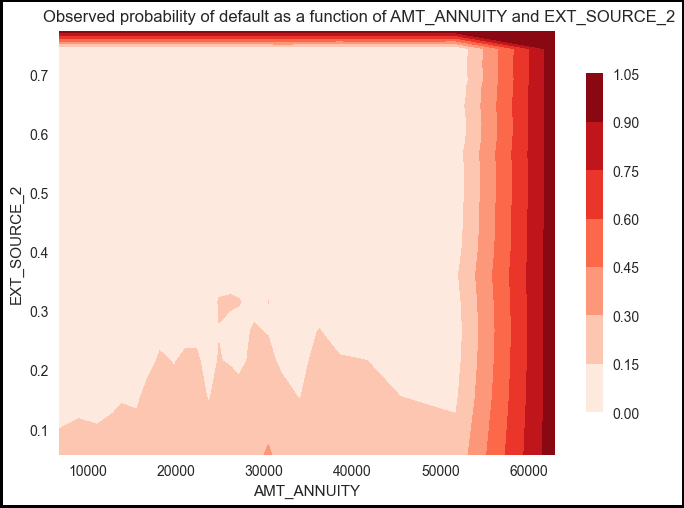

In [38]:
plt.style.use('seaborn')
fig = plt.figure(edgecolor='black', linewidth=4)
plt.contourf(X, Y, grid_proba_default, cmap='Reds')
plt.colorbar(shrink=0.8)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
fig.suptitle(
    f'Observed probability of default as a function of {feature_1} and {feature_2}',
    y=0.92)


Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


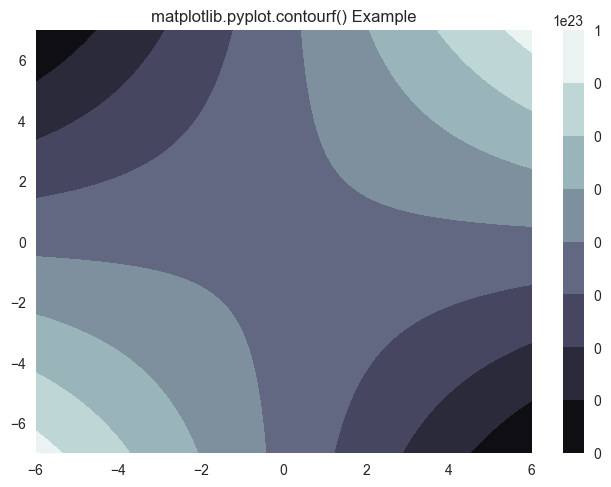

In [24]:

# Implementation of matplotlib function
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm

N = 1000
x = np.linspace(-6.0, 6.0, N)
y = np.linspace(-7.0, 7.0, N)
X, Y = np.meshgrid(x, y)

Z1 = np.exp(X * Y)
z = 50 * Z1
z[:5, :5] = -1
z = ma.masked_where(z <= 0, z)

cs = plt.contourf(X, Y, z,
                  locator=ticker.LogLocator(),
                  cmap="bone")

cbar = plt.colorbar(cs)

plt.title('matplotlib.pyplot.contourf() Example')
plt.show()

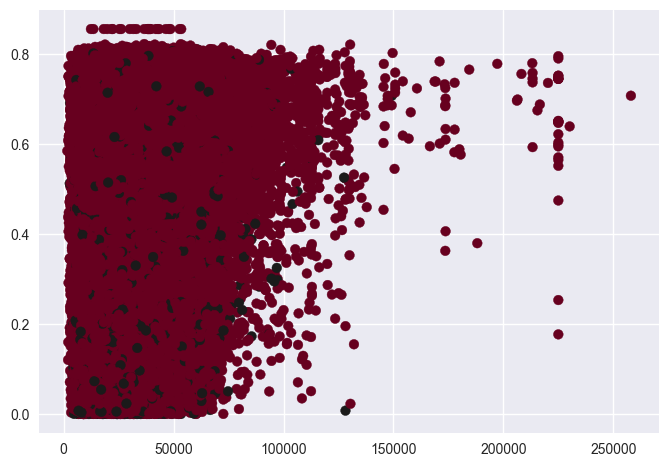

In [60]:
plt.scatter(x=df[feature_1], y=df[feature_2], c=df["y_true"], cmap="RdGy")

In [65]:
ser1.shape

(306835,)

In [66]:
x = ser1
y = ser2

X, Y = np.meshgrid(x, y)


MemoryError: Unable to allocate 701. GiB for an array with shape (306835, 306835) and data type float64

In [91]:

def lineplot_in_common(df_all_clients, feature):
    """Line plot of a quantitative feature. Common to all clients.
    Plot smoothed over 4000 clients. One dot plotted every 1000 clients.
    Args :
    - feature (string).
    Returns :
    - matplotlib figure.
    """
    target_bin_size = 4000

    # preparation of data
    df = pd.DataFrame({
        feature: df_all_clients[feature],
        'y_true': df_all_clients["TARGET"]
    })
    df = df.dropna().sort_values(axis=0, by=feature).copy()
    n_values = len(df)
    n_bins = int(np.ceil(n_values / target_bin_size))
    bin_size = int(np.floor(n_values / n_bins))
    index_bin_start = [bin_size * n for n in range(n_bins)] + [int(bin_size * (n + 0.25)) for n in range(n_bins)] + [
        int(bin_size * (n + 0.5)) for n in range(n_bins)] + [int(bin_size * (n + 0.75)) for n in range(n_bins)]

    index_bin_start = sorted(index_bin_start)

    # Observed probability of default for every bins
    proba_default = []
    feature_value_start = []
    for i in index_bin_start[2:-2]:
        some_bin = df.iloc[int(i - 0.5 * bin_size):int(i + 0.5 * bin_size)]
        some_bin_sum0 = (some_bin['y_true'] == 0).sum()
        some_bin_sum1 = (some_bin['y_true'] == 1).sum()
        some_bin_sum = some_bin_sum0 + some_bin_sum1
        proba_default_ = some_bin_sum1 / some_bin_sum
        proba_default.append(proba_default_)
        feature_value_start.append(df[feature].iloc[i])

    # Plotting
    plt.style.use('seaborn')
    fig = plt.figure(edgecolor='black', linewidth=4)
    plt.plot(feature_value_start, proba_default, color='k')
    ylim_high = plt.ylim()[1]
    plt.fill_between(x=feature_value_start, y1=proba_default, y2=0, color='r')
    plt.fill_between(x=feature_value_start,
                     y1=proba_default,
                     y2=1,
                     color='limegreen')
    plt.ylabel('Observed probability of default')
    plt.xlabel(feature)
    fig.suptitle(f'Observed probability of default as a function of {feature}',
                 y=0.92)
    plt.ylim(0, max(ylim_high, 0.3))
    return fig





In [92]:
def lineplot(feature, client_df, client_id, optimum_threshold, df_all_clients):
    """Plots a lineplot of the quantitative feature.
    Args :
    - feature (string).
    Returns :
    - matplotlib plot via st.pyplot.
    """

    figure = lineplot_in_common(df_all_clients, feature)
    y_max = plt.ylim()[1]
    x_client = client_df[feature].iloc[0]
    if str(x_client) == "nan":
        x_center = (plt.xlim()[1] + plt.xlim()[0]) / 2
        plt.annotate(text=f" Client {client_id}\n  data not available",
                     xy=(x_center, 0),
                     xytext=(x_center, y_max * 0.9))
    else:
        plt.axvline(x=x_client,
                    ymin=-1e10,
                    ymax=1e10,
                    c='k',
                    ls='dashed',
                    lw=2)
        plt.axhline(y=optimum_threshold,
                    xmin=-1e10,
                    xmax=1e10,
                    c='darkorange',
                    ls='dashed',
                    lw=1)  # line for the optimum_threshold
        plt.annotate(text=f" Client {client_id}\n  {round(x_client, 3)}",
                     xy=(x_client, y_max * 0.9))
    #st.pyplot(figure)
    #st.caption(feature + ": " + feature_description(feature))

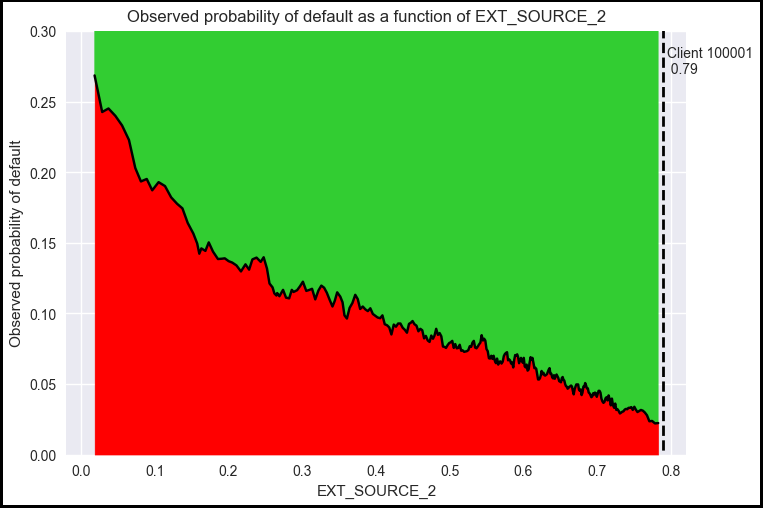

In [95]:
lineplot(feature=feature_2, client_df=client_df, client_id=100001, optimum_threshold=0.4,
         df_all_clients=data_all_clients)

In [81]:
feature = feature_2
feature

'EXT_SOURCE_2'

In [82]:
target_bin_size = 4000

# preparation of data
df = pd.DataFrame({
    feature: data_all_clients[feature],
    'y_true': data_all_clients["TARGET"]
})

In [83]:
df

,EXT_SOURCE_2,y_true
SK_ID_CURR,,
100002,0.262949,1
100003,0.622246,0
100004,0.555912,0
100006,0.650442,0
100007,0.322738,0
...,...,...
456251,0.681632,0
456252,0.115992,0
456253,0.535722,0


In [84]:
df = df.dropna().sort_values(axis=0, by=feature).copy()

In [85]:
df

,EXT_SOURCE_2,y_true
SK_ID_CURR,,
127936,8.173617e-08,0
289646,1.315956e-06,0
315717,5.002109e-06,1
305482,5.600338e-06,1
366811,5.939651e-06,1
...,...,...
209475,8.549997e-01,0
180759,8.549997e-01,0
400953,8.549997e-01,0


In [88]:
n_values = len(df)
n_bins = int(np.ceil(n_values / target_bin_size))
bin_size = int(np.floor(n_values / n_bins))

index_bin_start = [bin_size * n for n in range(n_bins)] + [int(bin_size * (n + 0.25)) for n in range(n_bins)] + [
    int(bin_size * (n + 0.5)) for n in range(n_bins)] + [int(bin_size * (n + 0.75)) for n in range(n_bins)]

index_bin_start = sorted(index_bin_start)




In [89]:
# Observed probability of default for every bins
proba_default = []
feature_value_start = []

for i in index_bin_start[2:-2]:
    some_bin = df.iloc[int(i - 0.5 * bin_size):int(i + 0.5 * bin_size)]
    some_bin_sum0 = (some_bin['y_true'] == 0).sum()
    some_bin_sum1 = (some_bin['y_true'] == 1).sum()
    some_bin_sum = some_bin_sum0 + some_bin_sum1
    proba_default_ = some_bin_sum1 / some_bin_sum
    proba_default.append(proba_default_)
    feature_value_start.append(df[feature].iloc[i])


(0.0, 0.3)

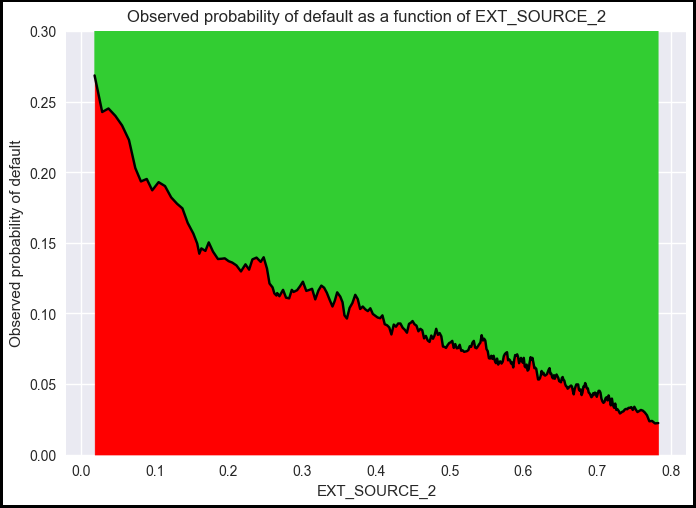

In [90]:
# Plotting
plt.style.use('seaborn')
fig = plt.figure(edgecolor='black', linewidth=4)
plt.plot(feature_value_start, proba_default, color='k')
ylim_high = plt.ylim()[1]
plt.fill_between(x=feature_value_start, y1=proba_default, y2=0, color='r')
plt.fill_between(x=feature_value_start,
                 y1=proba_default,
                 y2=1,
                 color='limegreen')
plt.ylabel('Observed probability of default')
plt.xlabel(feature)
fig.suptitle(f'Observed probability of default as a function of {feature}',
             y=0.92)
plt.ylim(0, max(ylim_high, 0.3))

In [99]:
columns_list

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'SK_ID_CURR',
 'TARGET']

In [100]:
list_features = columns_list.copy()
list_features.remove("TARGET")
list_features.remove("SK_ID_CURR")
list_features

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY']

In [101]:
mapping_x_ticks = {
    '1': 'Default Client',
    '0': 'Non Default Client'
}

In [105]:
feature_value = client_df[feature].values[0]

KeyError: 'P'

In [110]:
feature = "PAYMENT_RATE"
list_features[0]


'PAYMENT_RATE'

KeyError: '−1'

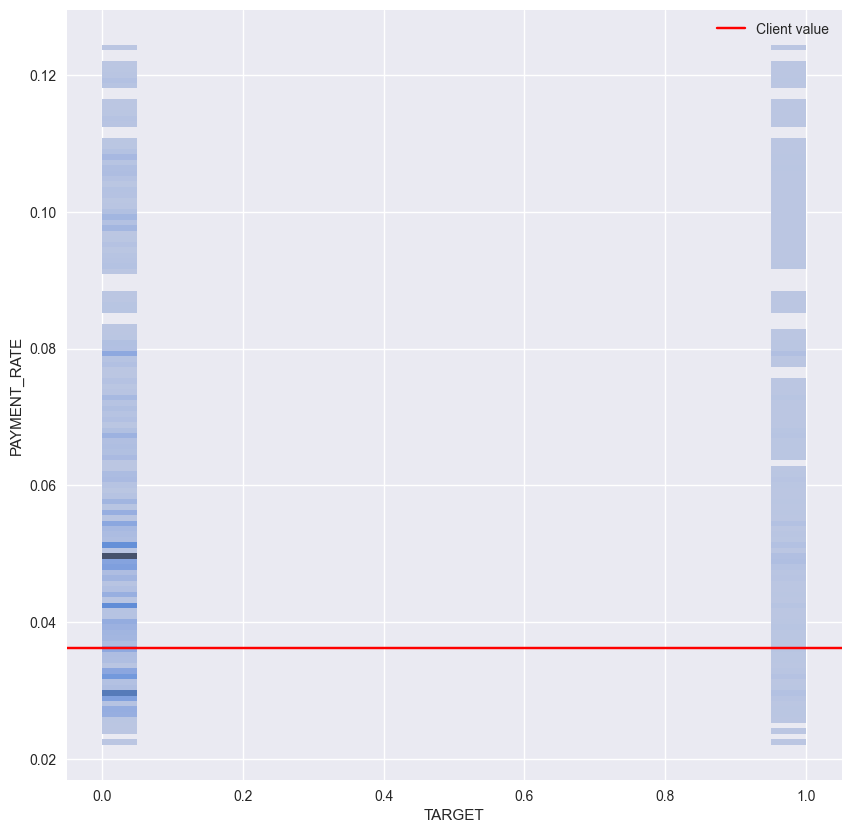

In [112]:

fig = plt.figure(figsize=(10, 10))
n = len(list_features)

# to display the boxplots on the same row


feature_value = client_df[feature].values[0]  # we get the value for the client's feature

# fig, ax = plt.subplots(figsize=(12, 9))
# create boxplot
bp = sns.histplot(data=data_all_clients,
                  y=feature,
                  x='TARGET',
                  palette=["#4286DE", "#EA365B"])
# add client threshold
bp.axhline(feature_value,
           color='r',
           label='Client value'
           )
# add label and legend
bp.legend()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [mapping_x_ticks[i] for i in labels]
bp.set_xticklabels(labels)
bp.set_title(f'{feature}')
bp.title.set_size(20)

# to see the plot in notebook :
# plt.tight_layout()
# plt.show()
# to see the plot in streamlit dashboard
plt.tight_layout()
#st.pyplot(fig)

In [117]:
data_0 = data_all_clients[data_all_clients["TARGET"] == 0]
data_0.shape

(282682, 8)

In [118]:
data_1 = data_all_clients[data_all_clients["TARGET"] == 1]
data_1.shape

(24825, 8)

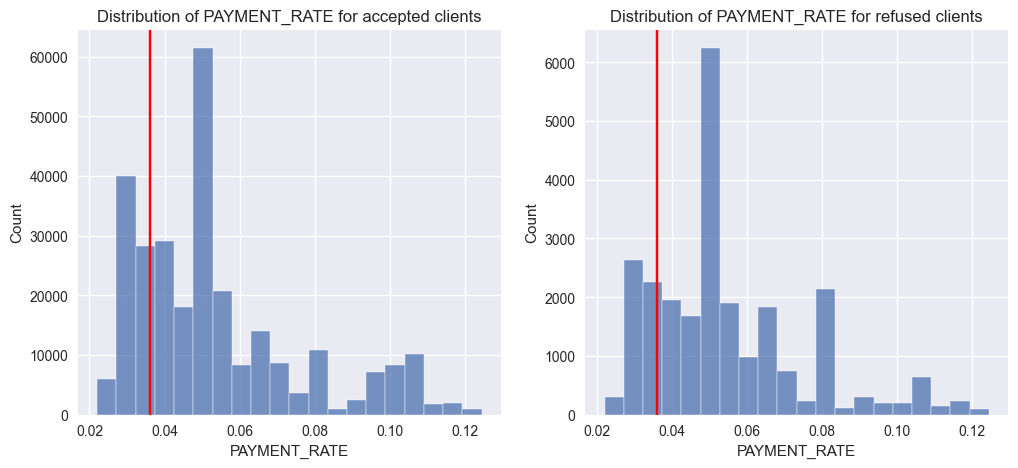

In [130]:
histgram_(data_all_clients, feature)

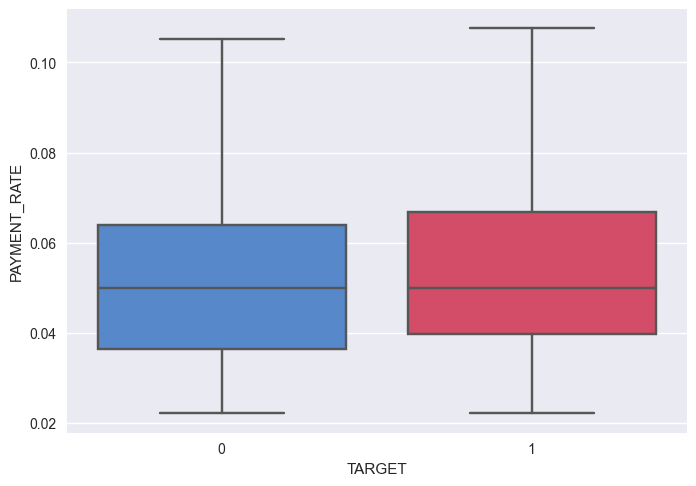

In [136]:
bp = sns.boxplot(data=data_all_clients,
                 y=feature,
                 x='TARGET',
                 orient="v",
                 showfliers=False,
                 palette=["#4286DE", "#EA365B"],
                 )



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyError: ''

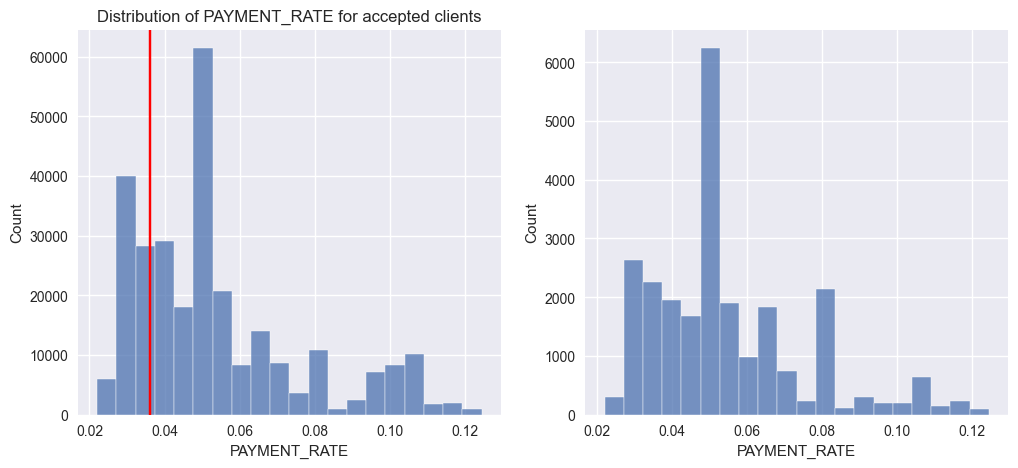

In [131]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)  # 1 en ordonnée / 2 en abcs / celle là la premiere
bp = sns.histplot(data=data_0,
                  x=feature,
                  bins=20)
# add client threshold
bp.axvline(feature_value,
           color='r',
           label='Client value'
           )
plt.title("Distribution of {} for accepted clients".format(feature))

ax = fig.add_subplot(122)  # 1 en ordonnée / 2 en abcs / celle là la premiere
bp = sns.histplot(data=data_1,
                  x=feature, bins=20)

# add client threshold
bp.axvline(feature_value,
           color='r',
           label='Client value'
           )
plt.title('Distribution of {} for refused clients'.format(feature))



In [ ]:
for i in range(2):
    position =
    bp = sns.histplot(data=data_0,
                      x=feature,
                      bins=20)
    # add client threshold
    bp.axvline(feature_value,
               color='r',
               label='Client value'
               )

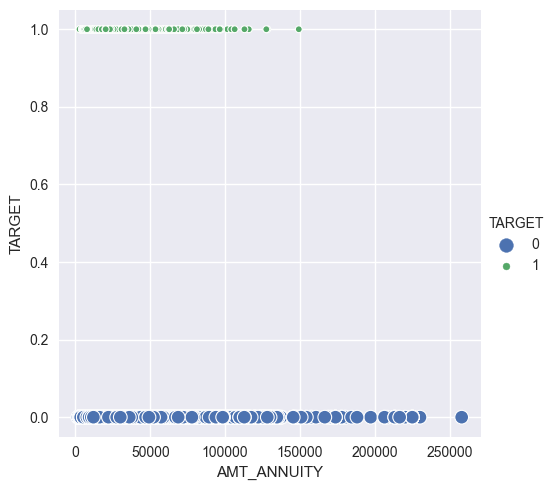

In [140]:
sns.relplot(x=feature_1, y="TARGET",
            data=data_all_clients, kind="scatter",
            size="TARGET",
            hue="TARGET");

In [148]:
list_features

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY']

In [172]:
data_test[data_test[feature_1].isna()]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Sent proposal_MAX,CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN,CC_NAME_CONTRACT_STATUS_Sent proposal_SUM,CC_NAME_CONTRACT_STATUS_Sent proposal_VAR,CC_NAME_CONTRACT_STATUS_Signed_MIN,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
106206,0,0,1,2,270000.0,790830.0,NaN,675000.0,0.010643,-11344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
108106,0,0,0,1,81000.0,675000.0,NaN,675000.0,0.035792,-9824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116047,1,1,0,0,270000.0,441000.0,NaN,441000.0,0.046220,-8856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129535,0,0,1,0,135000.0,364896.0,NaN,315000.0,0.035792,-17386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
149918,0,0,1,0,180000.0,1350000.0,NaN,1350000.0,0.046220,-20168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151100,0,0,0,0,315000.0,886320.0,NaN,720000.0,0.046220,-18028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153420,1,0,0,0,225000.0,319500.0,NaN,319500.0,0.030755,-16134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160119,1,1,0,0,315000.0,440784.0,NaN,360000.0,0.026392,-13101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167328,1,0,1,1,157500.0,792162.0,NaN,630000.0,0.008068,-13212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
client_id = 100001
client_df = data_test[data_test.index == client_id]
client_df[[feature_1, feature_2]]

,AMT_ANNUITY,EXT_SOURCE_2
SK_ID_CURR,,
100001,20560.5,0.789654


In [177]:
def add_position_client(client_df, feature_1, feature_2, ax=None):
    x_client = client_df[feature_1].iloc[0]
    y_client = client_df[feature_2].iloc[0]

    if str(x_client) == "nan" or str(y_client) == "nan":
        x_center = (plt.xlim()[1] + plt.xlim()[0]) / 2
        y_center = (plt.ylim()[1] + plt.ylim()[0]) / 2
        plt.text(s=f" Client {client_id}\n  data not available",
                 x=x_center,
                 y=y_center,
                 ax=ax)

    # plot only the y-axis line
    if str(y_client) != "nan":
        plt.axhline(y=y_client,
                    c='k',
                    ls='dashed',
                    lw=1,
                    ax=ax)

    # plot only the x-axis line
    if str(x_client) != "nan":
        plt.axvline(x=x_client,
                    c='k',
                    ls='dashed',
                    lw=1,
                    ax=ax)


In [181]:

"Scatter plot of {} as a function of {}".format(feature_2, feature_1)


'Scatter plot of EXT_SOURCE_2 as a function of AMT_ANNUITY'

In [201]:
def graph_two_features_comparing_all_clients(df_all_clients, feature_1, feature_2, client_df):
    """
    :param df_all_clients:
    :param feature_1:
    :param feature_2:
    :param client_df:
    """
    plt.figure(figsize=(8, 6))

    plot = sns.scatterplot(x=feature_1, y=feature_2, data=df_all_clients, style='TARGET', hue='TARGET',
                           size_order=[1, 0], size="TARGET", palette=["#4286DE", "#EA365B"])
    add_position_client(client_df, feature_1, feature_2)
    plot.set_title("Scatter plot of {} as a function of {} for all clients".format(feature_2, feature_1))
    plt.tight_layout()
    plt.show()

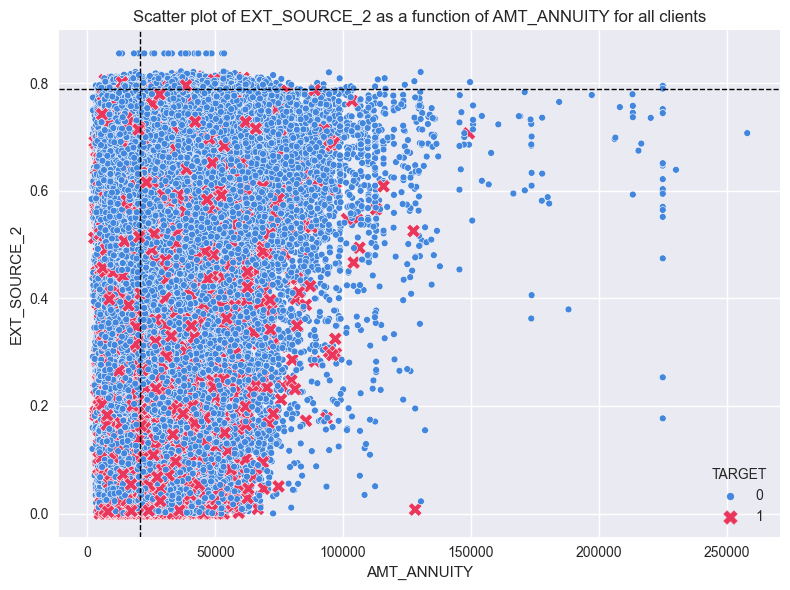

In [203]:
graph_two_features_comparing_all_clients(data_all_clients, feature_1, feature_2, client_df)

TypeError: add_position_client() takes 3 positional arguments but 4 were given

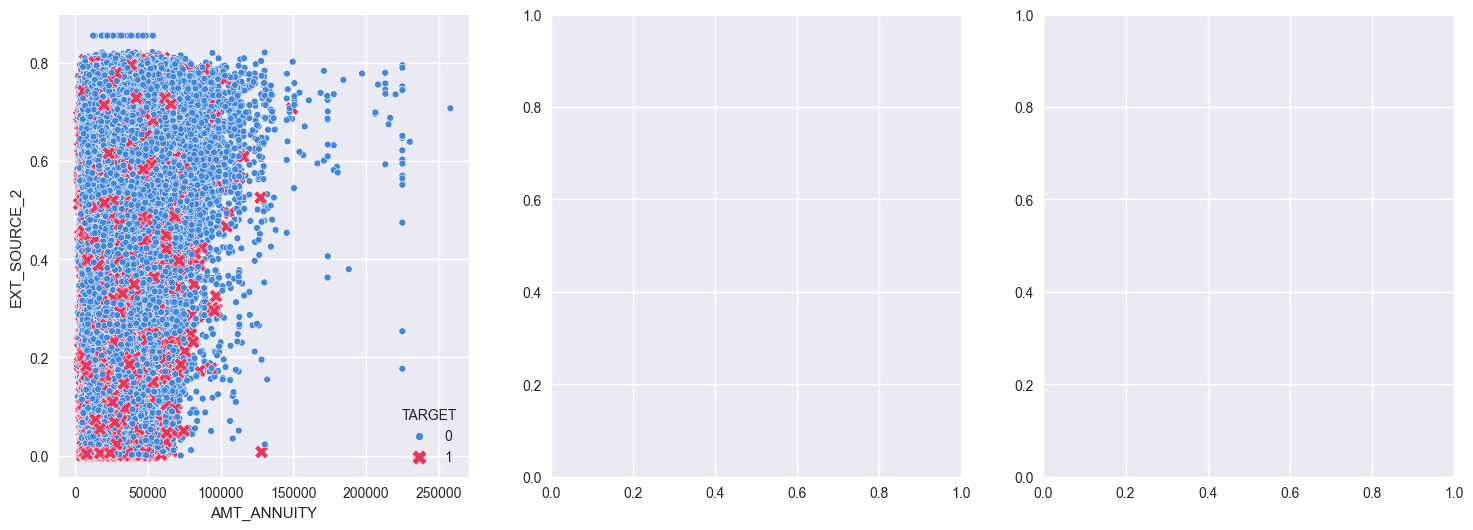

In [194]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))



sns.scatterplot(ax=axes[1], x=feature_1, y=feature_2, data=data_all_clients[data_all_clients["TARGET"] == 0],
                palette="b")
axes[1].set_title("Scatter plot of {} as a function of {} for clients accepted for a loan".format(feature_2, feature_1))

sns.scatterplot(ax=axes[2], x=feature_1, y=feature_2, data=data_all_clients[data_all_clients["TARGET"] == 1],
                hue="TARGET", color="#EA365B")
axes[2].set_title("Scatter plot of {} as a function of {} for clients refused for a loan".format(feature_2, feature_1))

plt.tight_layout()
plt.show()

In [204]:
list_features

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY']

In [214]:
s = ""
for e in list_features:
    print("-", e, end="\n")


- PAYMENT_RATE
- EXT_SOURCE_1
- EXT_SOURCE_3
- EXT_SOURCE_2
- DAYS_BIRTH
- DAYS_EMPLOYED
- AMT_ANNUITY


In [227]:
s = ""
for e in list_features:
    s = s + '\n- ' + e
print(s)


- PAYMENT_RATE
- EXT_SOURCE_1
- EXT_SOURCE_3
- EXT_SOURCE_2
- DAYS_BIRTH
- DAYS_EMPLOYED
- AMT_ANNUITY
